# Introduction to Quantum Computing Workshop - Lesson 3 - Answers
## Building Qubits and Gates with Qiskit
Author: Nico Kuijpers<br>
Date: May 17, 2025<br>

This notebook makes use of the following Python libraries
* QuTip - Quantum Toolbox in Python
* Qiskit - Quantum Information Software Kit
* Numpy
* Matplotlib

Topics addressed in this notebook
* Bra-ket notation 
* Quantum states
* Bloch sphere
* Quantum gates
* Measuring a qubit
* Qiskit
* Simulation of a quantum circuit in Qiskit
* Quantum Phase Estimation (single qubit)

## QuTiP - Quantum Toolbox in Python

QuTiP is open-sourse software for simulation and visualisation of the dynamics of open quantum systems. 
In this notebook, QuTiP is used for the visualisation of a quantum state using the Bloch sphere.

See: https://qutip.org/

QuTiP can be installed by

`!pip install qutip`

### Remark
In case you wor with environments 

In [1]:
# Uncomment the line below to install qutip
# !pip install qutip

## Qiskit - Quantum Information Software Kit
Qiskit is an open-source software development kit (SDK) for programming quantum circuits, simulating execution or executing them on real quantum computers. In this notebook we will use Qiskit to define quantum circuits consisting of only one qubit and to simulate the effect of quantum gates applied to a qubit.

For documentation on Qiskit, see https://docs.quantum.ibm.com/

Qiskit can be installed by

`!pip install qiskit`

In [2]:
# Uncomment the line below to install qiskit
# !pip install qiskit

In this notebook, we will use the Aer simulator from Qiskit. The simulator can be installed by

`!pip install qiskit-aer`

In [3]:
# Uncomment the line below to install qiskit-aer
# !pip install qiskit-aer

## NumPy
NumPy (short for Numerical Python) is a Python library specifically aimed at scientific computing. It is used for working with (multi-dimensional) arrays. Amongst others, it provides functions for linear algebra, fourier transforms, and matrices.

NumPy is usually imported using the alias `np`. You can check the version using `np.__version__`.

In [4]:
import numpy as np

print(np.__version__)

2.2.5


## Matplotlib
Matplotlib is a Python library for the creation of visualisations. See https://matplotlib.org/

Module `pyplot` from Matplotlib is imported using the alias `plt`.

In [5]:
import matplotlib.pyplot as plt

As an example, we generate 10000 random values with mean 0 and standard deviation 1. The result is shown using a histogram.

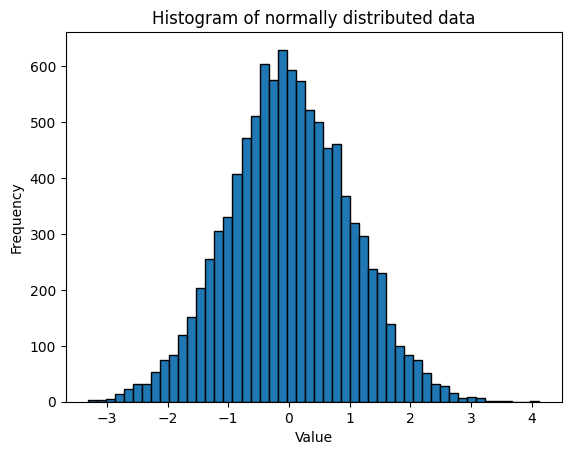

In [6]:
# Generate 10000 random numbers from a normal distribution with mean 0 and standard deviation 1
data = np.random.normal(loc=0, scale=1, size=10000)

# Create a histogram
plt.hist(data, bins=50, edgecolor='black')
plt.title('Histogram of normally distributed data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Bra-ket notation
We will make use of the bra-ket or Dirac notation to describe (quantum) states and (quantum) operators. The following notation will be used:
* $\ket{a}$ is called *ket* and represents a column vector with $1$ in entry $a$ and $0$ everywhere else.
* $\bra{a}$ is called *bra* and represents a row vector with $1$ in entry $a$ and $0$ everywhere else.
* $\bra{a} \ket{b}$ or $\braket{a|b}$ is the *inner product* of $\bra{a}$ and $\ket{b}$, which is $1$ if $a=b$ and $0$ if $a\neq b$.
* $\ket{a} \bra{b}$ is the *outer product* of $\ket{a}$ and $\bra{b}$, which is a matrix with $1$ in entry $(a,b)$ and $0$ everywhere else.

Below two Python functions are defined. 

Function `ket` with parameters $N$ and $a$ can be used to create a column vector of length $N$ with $1$ in entry $a$ and $0$ everywhere else.

In [7]:
def ket(N, a):
    ket = np.zeros((N, 1))
    ket[a, 0] = 1
    return ket

Let's create a column vector of length $2$ represented as $\ket{0}$ using function `ket`.

In [8]:
state = ket(2,0)
print(state)

[[1.]
 [0.]]


### Exercise
Using function `ket` create a column vector of length $4$ represented as $\ket{3}$.

In [9]:
# A column vector of length 4 represented as |3>
state = ket(4,3)
print(state)

[[0.]
 [0.]
 [0.]
 [1.]]


Function `bra` with parameters $N$ and $a$ can be used to create a row vector of length $N$ with $1$ in entry $a$ and $0$ everywhere else.

In [10]:
def bra(N, a):
    bra = np.zeros((1, N))
    bra[0, a] = 1
    return bra

Let's create a row vector of length $2$ represented as $\bra{1}$ using function `bra`.

In [11]:
state = bra(2,1)
print(state)

[[0. 1.]]


### Exercise
Using function `bra` create a row vector of length $8$ represented as $|5\rangle$.

In [12]:
# A row vector of length 8 represented as |5>
state = bra(8,5)
print(state)

[[0. 0. 0. 0. 0. 1. 0. 0.]]


## Quantum states
A single qubit can be in a superposition of two basis states, here denoted by $\ket{0}$ and $\ket{1}$. 
The quantum state of a single qubit in super position can be represented as

$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$,

where $\alpha$ is a complex number representing the probability that the qubit would be in state $\ket{0}$ and 
$\beta$ is a complex number representing the probability that the qubit would be in state $\ket{1}$.
$\alpha$ and $\beta$ are called *probability amplitudes*.
To ensure that the total probability is equal to $1$, $\alpha$ and $\beta$ should satisfy the
*normalization condition*, i.e.,

$|\alpha|^2 + |\beta|^2 = 1$.

Here, $|\alpha|$ and $|\beta|$ represent the magnitude (or absolute value) of $\alpha$ and $\beta$.
The square of the magnitude represents the probability of measuring the qubit to be in the corresponding basis state.

The state of a quantum circuit is usually represented by a state vector. For example, if a quantum circuit consists of one qubit, 
the state vector $\ket{\psi}$ would be represented by

$\ket{\psi} = \alpha \ket{0} + \beta \ket{1} \rightarrow
\begin{bmatrix} \alpha \\ \beta \end{bmatrix}$

## Bloch sphere

The Bloch sphere can be used to visualise the quantum state $|\psi\rangle$ of a qubit defined by

$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$.

The Bloch sphere is a sphere in 3D space with the center in the origin $(0,0,0)$ and radius $1$. States $\ket{0}$ and $\ket{1}$ are 
located at the north pole $(0,0,1)$ and south pole $(0,0,-1)$, respectively. 

Any quantum state $\ket{\psi}$ of a single qubit can be represented as a point on the Bloch sphere or as a vector from the origin to that point by $\theta$ and $\phi$ defined by

$\ket{\psi} = \text{cos}(\frac{\theta}{2}) \ket{0} + e^{i \phi} \text{sin}(\frac{\theta}{2}) \ket{1}$, 

where $\theta$, $0 \leq \theta \leq \pi$, is the angle with the $z$-axis and $\phi$, $0 \leq \phi \leq 2\pi$, the angle with the $x$-axis.

Under the assumption that $\braket{\psi|\psi} = 1$, i.e., the normalization condition, $\theta$ and $\phi$ represent a point on the Bloch sphere.

Below, a Bloch sphere is shown for quantum state $\ket{0}$ using `Bloch` and `Qobj` from QuTiP.

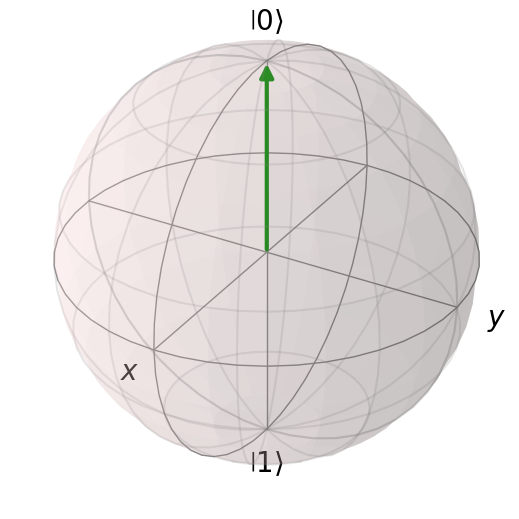

In [13]:
from qutip import Bloch, Qobj
import numpy as np

# Define the quantum state |ψ⟩ = α|0⟩ + β|1⟩
alpha = 1
beta = 0

# Normalize the quantum state if needed
norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
alpha /= norm
beta /= norm

# Define the quantum state
psi = np.array([alpha, beta])

# Create a Qobj for the quantum state
psi_qobj = Qobj(psi)

# Initialize the Bloch sphere
bloch_sphere = Bloch()

# Add the state vector to the Bloch sphere
bloch_sphere.add_states(psi_qobj)

# Render the Bloch sphere
bloch_sphere.show()

## Unitary operations
A unitary operation on a quantum circuit of $N$ qubits is represented by a $2^N \times 2^N$ unitary matrix of complex numbers.
A square matrix of complex numbers $U$ is unitary if the following equalities are satisfied:

$U^\dagger U = \mathbf{I} = U U^\dagger$,

where matrix $U^\dagger$ represents the conjugate transpose of matrix $U$ and $\mathbf{I}$ is the identity matrix of the same size.

## Quantum gates
Quantum gates are unitary operations that can be performed on one or several qubits of a quantum circuit. These operations can be applied to a state vector $|\psi\rangle$:

$|\psi_{\text{new}}\rangle = U |\psi\rangle$

Below are unitary operations commonly used in quantum computing that operate on single qubit:

Pauli operations $I$, $X$, $Y$, and $Z$ are quantum operations represented by the Pauli matrices:

$I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$

$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$

$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$

The Hadamard operation $H$ is represented by

$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

Below function `hadamard` is defined to create $2 \times 2$ matrix $H$.

In [14]:
# Function to create matrix for Hadamard operation
def hadamard():
    c = complex(1/np.sqrt(2),0)
    return np.array([[c,c],[c,-c]])

In [15]:
H = hadamard()
print(H)

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678-0.j]]


Let's check if $H$ is a unitary matrix. This means we have to check whether 

$H^\dagger H = \mathbf{I} = H H^{\dagger}$,

where $H^\dagger$ is the conjugate transpose of $H$ and $\mathbf{I}$ is the $2 \times 2$ identiy matrix.

In [16]:
H_dagger = H.conj().T
print(np.dot(H_dagger, H))
print()
print(np.dot(H, H_dagger))

[[ 1.00000000e+00+0.j -2.23711432e-17+0.j]
 [-2.23711432e-17+0.j  1.00000000e+00+0.j]]

[[ 1.00000000e+00+0.j -2.23711432e-17+0.j]
 [-2.23711432e-17+0.j  1.00000000e+00+0.j]]


### Remark
Note that -2.23711432e-17+0.j is 0 and 1.00000000e+00+0.j is 1.

### Exercise
Write python functions `identity`, `pauli_x`, `pauli_y`, and `pauli_z` to create $2 \times 2$ matrices for Pauli operations $I$, $X$, $Y$, and $Z$ defined above.

In [17]:
# Function to create matrix for identity operation
def identity():
    return np.array([[1,0],[0,1]])

In [18]:
# Function to create matrix for Pauli X operation
def pauli_x():
    return np.array([[0,1],[1,0]])

In [19]:
# Function to create matrix for Pauli Y operation
def pauli_y():
    c = complex(0,1)
    return np.array([[0,-c],[c,0]])

In [20]:
# Function to create matrix for Pauli Z operation
def pauli_z():
    return np.array([[1,0],[0,-1]])

When we apply the Identity operation on basis state $\ket{0}$, we obtain

$I \ket{0} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} =
\begin{bmatrix} 1 \\ 0 \end{bmatrix} =
\ket{0}
$

As expected, the state does not change.

### Exercise
Apply the Identity operation on basis state $\ket{0}$ and print the result.

In [21]:
# Apply identity on basis state |0>
I = identity()
state = ket(2,0)
state_new = np.dot(I,state)
print(state_new)

[[1.]
 [0.]]


When we apply the Pauli X operation on basis state $\ket{0}$, we obtain

$
X \ket{0} = 
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} =
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$

This is basis state $\ket{1}$.

### Exercise
Apply the Pauli X operation on basis state $\ket{0}$ and print the result.

In [22]:
# Apply Pauli X on basis state |0>
X = pauli_x()
state = ket(2,0)
state_new = np.dot(X,state)
print(state_new)


[[0.]
 [1.]]


When we apply the Pauli Y operation on basis state $\ket{0}$, we obtain

$
Y \ket{0} = 
\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} =
\begin{bmatrix}
0 \\
i
\end{bmatrix}
$

Thus $Y \ket{0} = i \ket{1}$. This is basis state $\ket{1}$, but with a global phase of $i$. Since a global phase cannot be measured, $i \ket{1}$ is *physically* equivalent to $\ket{1}$, but *mathematically* different.

### Exercise
Apply the Pauli Y operation on basis state $\ket{0}$ and print the result.

In [23]:
# Apply Pauli Y on basis state |0>
Y = pauli_y()
state = ket(2,0)
state_new = np.dot(Y,state)
print(state_new)

[[0.+0.j]
 [0.+1.j]]


When we apply the Pauli Z operaton on basis state $\ket{0}$, we obtain

$
Z \ket{0} = 
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} =
\begin{bmatrix} 1 \\ 0 \end{bmatrix} =
\ket{0}
$.

Thus, the state remains unchanged.

### Exercise
Apply the Pauli Z operation on basis state $\ket{0}$ and print the result.

In [24]:
# Apply Pauli Z on basis state |0>
Z = pauli_z()
state = ket(2,0)
state_new = np.dot(Z,state)
print(state_new)

[[1.]
 [0.]]


When we apply the Hadamard operation on basis state $\ket{0}$, we obtain

$
H \ket{0} = 
\frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$

This state is called the *plus* state or *Hadamard* state and is denoted as $\ket{+}$.

In terms of basis states $\ket{0}$ and $\ket{1}$, the Hadamard state is defined by

$H \ket{0} = \ket{+} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$.

Its counterpart is the *minus* state or *negative Hadamard* state. It is denoted as $\ket{-}$ and defined by

$\ket{-} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$.

The $\ket{-}$ state can be obtained from the $\ket{0}$ state by first applying the Hadamard operation and then the Pauli Z operation.
 
Let's apply the Hadamard operation on basis state $\ket{0}$ and print the resulting state.

In [25]:
# Apply Hadamard on basis state |0>
psi_init = ket(2,0)
H = hadamard()
psi = np.dot(H, psi_init)
print(psi)

[[0.70710678+0.j]
 [0.70710678+0.j]]


### Exercise
Apply the Hadamard operation to obtain the plus state $\ket{+}$ and then the Pauli Z operation to obtain the minus state $\ket{-}$. 
Print the resulting state.

In [26]:
# Apply Hadamard on basis state |0> to obtain plus state |+>
# Apply Pauli Z on plus state |+> to obtain minus state |->
psi_init = ket(2,0)
H = hadamard()
psi = np.dot(H, psi_init)
Z = pauli_z()
psi_final = np.dot(Z, psi)
print(psi)
print()
print(psi_final)

[[0.70710678+0.j]
 [0.70710678+0.j]]

[[ 0.70710678+0.j]
 [-0.70710678+0.j]]


### Remark
Note that 0.70710678+0.j is $\frac{1}{\sqrt(2)}$.

## Example
Below, the Hadamard operation is applied to a qubit in basis state $|0\rangle$. The resulting state $\ket{+}$ is visualized using a Bloch sphere.

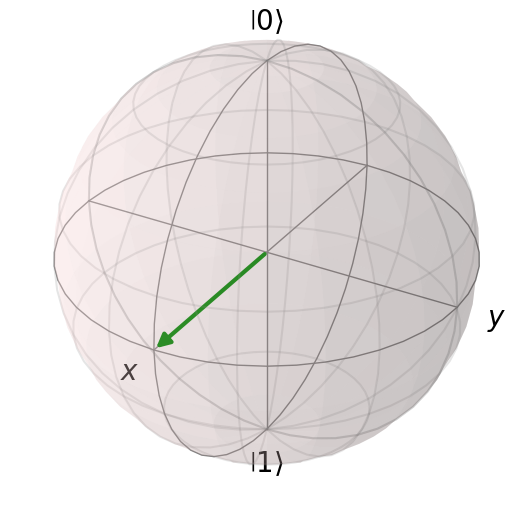

In [27]:
from qutip import Bloch, Qobj
import numpy as np

# Define the initial quantum state |ψ⟩ = |0⟩
psi_init = ket(2,0)

# Define the Hadamard operation
H = hadamard()

# Apply the Hadamard operation
psi = np.dot(H, psi_init)

# Create a Qobj for the quantum state
psi_qobj = Qobj(psi)

# Initialize the Bloch sphere
bloch_sphere = Bloch()

# Add the state vector to the Bloch sphere
bloch_sphere.add_states(psi_qobj)

# Render the Bloch sphere
bloch_sphere.show()

### Exercise
Apply the Hadamard operation two times and visualise the result using the Bloch sphere. Can you explain the result?

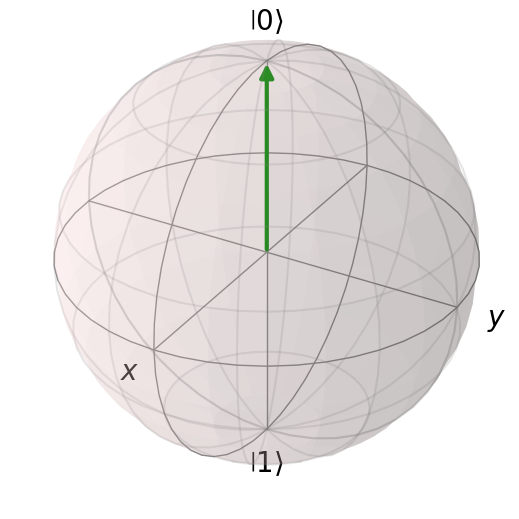

In [28]:
# Apply the Hadamard operation two times and visualise the result using the Bloch sphere
from qutip import Bloch, Qobj
import numpy as np

# Define the initial quantum state |ψ⟩ = |0⟩
psi_init = ket(2,0)

# Define the Hadamard operation
H = hadamard()

# Apply the Hadamard operation
psi_intermediate = np.dot(H, psi_init)

# Apply the Hadamard operation once more
psi = np.dot(H, psi_intermediate)

# Create a Qobj for the quantum state
psi_qobj = Qobj(psi)

# Initialize the Bloch sphere
bloch_sphere = Bloch()

# Add the state vector to the Bloch sphere
bloch_sphere.add_states(psi_qobj)

# Render the Bloch sphere
bloch_sphere.show()

### Exercise
Apply the Hadamard operation and then the Pauli Z operation and visualise the result using the Bloch sphere. What state is this? What happens if you first apply the Pauli Z operation and then the Hadamard operation?

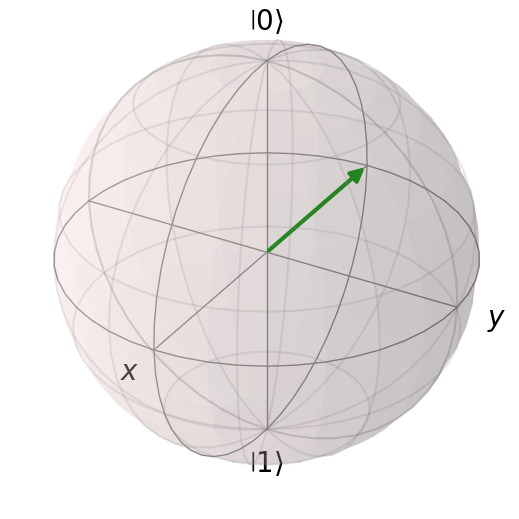

In [29]:
# Apply the Hadamard operation and the Pauli Z operation and visualise the result using the Bloch sphere
from qutip import Bloch, Qobj
import numpy as np

# Define the initial quantum state |ψ⟩ = |0⟩
psi_init = ket(2,0)

# Define the Hadamard operation
H = hadamard()

# Define the Pauli Z operation
Z = pauli_z()

# Apply the Hadamard operation
psi_intermediate = np.dot(H, psi_init)

# Apply the Pauli Z operation
psi = np.dot(Z, psi_intermediate)

# Create a Qobj for the quantum state
psi_qobj = Qobj(psi)

# Initialize the Bloch sphere
bloch_sphere = Bloch()

# Add the state vector to the Bloch sphere
bloch_sphere.add_states(psi_qobj)

# Render the Bloch sphere
bloch_sphere.show()

## Phase operations
Phase operations $P(\varphi)$ are described by

$P(\varphi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\varphi} \end{bmatrix}$.

The $S$-gate is the same as $P(\varphi)$ with $\varphi = \frac{\pi}{2}$:

$
S = P(\frac{\pi}{2}) =
\begin{bmatrix} 1 & 0 \\ 0 & e^{i \frac{\pi}{2}} \end{bmatrix} =
\begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}
$.

The $T$-gate is the same as $P(\varphi)$ with $\varphi = \frac{\pi}{4}$:

$
T = P(\frac{\pi}{4}) =
\begin{bmatrix} 1 & 0 \\ 0 & e^{i \frac{\pi}{4}} \end{bmatrix}
$.

The Pauli Z operation is the same as $P(\varphi)$ with $\varphi = \pi$:

$
Z = P(\pi) =
\begin{bmatrix} 1 & 0 \\ 0 & e^{i \pi} \end{bmatrix} = 
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$.

Below function `phase` with parameter `phi` is defined to create a matrix for the phase operation. Note that `phi` must be in radians.

In [30]:
# Function to create matrix for phase operation
def phase(phi):
    c = np.exp(1j * phi)
    return np.array([[1,0],[0, c]])

### Exercise
Write python functions `s_gate`, and `t_gate` to create matrices for the $S$-gate and $T$-gate, respectively. You should call function `phase` within these functions.

In [31]:
# Function to create matrix for S-gate
def s_gate():
    return phase(np.pi/2)

In [32]:
# Function to create matrix for T-gate
def t_gate():
    return phase(np.pi/4)

## Example
Below, the Hadamard operation is applied to a qubit in basis state $|0\rangle$.
Next, the phase operation $P(\varphi)$ is applied $10$ times with $\varphi = \frac{\pi}{8}$.
The initial state $\ket{0}$, all intermediate states and the final state is visualized in the Bloch sphere. 
The total number of states is $12$. The colors used to visualize the states range from green to blue.

Note that `nr_colors` must be equal to the number of times function `add_states` is called.

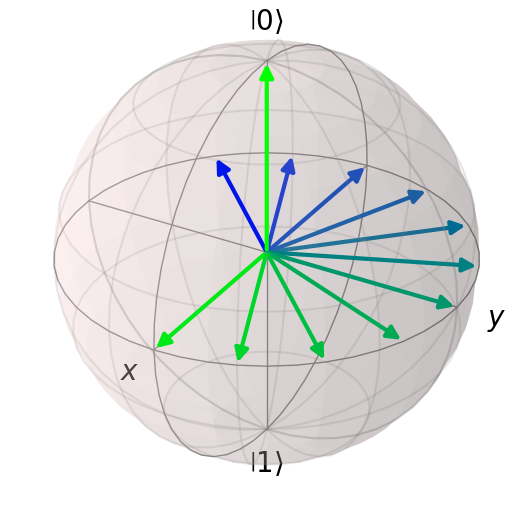

In [33]:
# Define the initial quantum state |ψ⟩ = |0⟩
psi = ket(2,0)

# Define the Hadamard operation
H = hadamard()

# Define the phase operation with theta = pi/8
P = phase(np.pi/8)

# Initialize the Bloch sphere
bloch_sphere = Bloch()

# Add the initial state to the Bloch sphere
psi_qobj = Qobj(psi)
bloch_sphere.add_states(psi_qobj)

# Apply the Hadamard operation
psi = np.dot(H, psi)

# Add the current state to the Bloch sphere
psi_qobj = Qobj(psi)
bloch_sphere.add_states(psi_qobj)

# Apply the phase operation 10 times and add the intermediate states to the Bloch sphere
for i in range(10):
    psi = np.dot(P, psi)
    psi_qobj = Qobj(psi)
    bloch_sphere.add_states(psi_qobj)

# Define a color range to visualize the states in the Bloch sphere
nr_colors = 12 # Must be equal to number of times add_states is called
colors = []
for i in range(nr_colors):
    red = 0
    green = 1 - i/nr_colors
    blue = i/nr_colors
    color = [red, green, blue]
    colors.append(color)

# Set vector of colors
bloch_sphere.vector_color = colors

# Render the Bloch sphere
bloch_sphere.show()

### Exercise
Apply the Hadamard operation and then the $T$-gate $8$ times. Visualise the initial state, intermediate states, and the final state using the Bloch sphere. Can you explain the result?

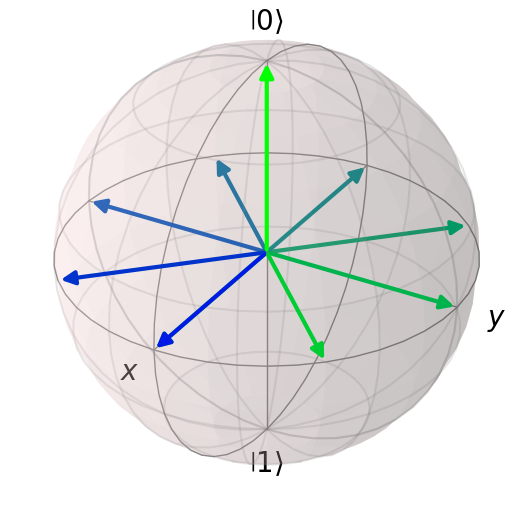

In [34]:
# Apply the Hadamard operation and then the T-gate 8 times
# Visualise the initial state, intermediate states, and the final state using the Bloch sphere

# Define the initial quantum state |ψ⟩ = |0⟩
psi = ket(2,0)

# Define the Hadamard operation
H = hadamard()

# Define the T operation
T = t_gate()

# Initialize the Bloch sphere
bloch_sphere = Bloch()

# Add the initial state to the Bloch sphere
psi_qobj = Qobj(psi)
bloch_sphere.add_states(psi_qobj)

# Apply the Hadamard operation
psi = np.dot(H, psi)

# Add the current state to the Bloch sphere
psi_qobj = Qobj(psi)
bloch_sphere.add_states(psi_qobj)

# Apply the T operation 8 times and add the intermediate states to the Bloch sphere
for i in range(8):
    psi = np.dot(T, psi)
    psi_qobj = Qobj(psi)
    bloch_sphere.add_states(psi_qobj)

# Define a color range to visualize the states in the Bloch sphere
nr_colors = 10 # Must be equal to number of times add_states is called
colors = []
for i in range(nr_colors):
    red = 0
    green = 1 - i/nr_colors
    blue = i/nr_colors
    color = [red, green, blue]
    colors.append(color)

# Set vector of colors
bloch_sphere.vector_color = colors

# Render the Bloch sphere
bloch_sphere.show()

## Rotations
Rotations $R_x(\varphi)$, $R_y(\varphi)$, and $R_z(\varphi)$ about the $x$, $y$, and $z$ axes are described by

$R_x(\varphi) = \begin{bmatrix} \text{cos}(\frac{\varphi}{2}) & -i\text{sin}(\frac{\varphi}{2}) \\ 
-i\text{sin}(\frac{\varphi}{2}) & \text{cos}(\frac{\varphi}{2}) \end{bmatrix}$

$R_y(\varphi) = \begin{bmatrix} \text{cos}(\frac{\varphi}{2}) & -\text{sin}(\frac{\varphi}{2}) \\ 
\text{sin}(\frac{\varphi}{2}) & \text{cos}(\frac{\varphi}{2}) \end{bmatrix}$

$R_z(\varphi) = \begin{bmatrix} e^{-i\frac{\varphi}{2}} & 0 \\ 0 & e^{i\frac{\varphi}{2}} \end{bmatrix}$

Below function `rotate_x` with parameter `phi` is defined to create a matrix for the $R_x(\varphi)$ operation. As before, `phi` must be in radians.

In [35]:
# Function to create matrix for rotation about the x-axis
def rotate_x(phi):
    sin = np.sin(phi/2)
    cos = np.cos(phi/2)
    return np.array([[cos, -1j * sin],[-1j * sin, cos]], dtype=complex)

### Exercise
Write python functions `rotate_y` and `rotate_z` to create matrices for the $R_y(\varphi)$ and $R_z(\varphi)$, respectively.

In [36]:
# Function to create matrix for rotation about the y-axis
def rotate_y(phi):
    sin = np.sin(phi/2)
    cos = np.cos(phi/2)
    return np.array([[cos, -sin],[sin, cos]], dtype=complex)

In [37]:
# Function to create matrix for rotation about the z-axis
def rotate_z(phi):
    a = np.exp(-1j * (phi/2))
    b = np.exp(1j * (phi/2))
    return np.array([[a,0],[0,b]], dtype=complex)

### Exercise
Choose a value for $\varphi$ and apply $5$ times $R_x(\varphi)$ and then $5$ times $R_z(\varphi)$. Visualise the initial state, intermediate states, and the final state using the Bloch sphere. Can you explain the result?

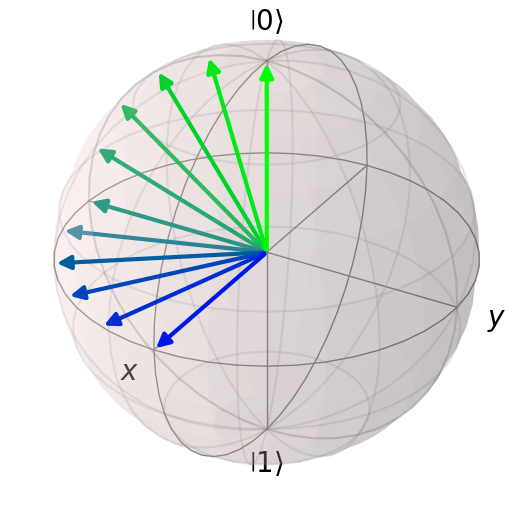

In [38]:
# Apply 5 times Rx(phi) and then 5 times Rz(phi)
# Visualise the initial state, intermediate states, and the final state using the Bloch sphere

# Define the initial quantum state |ψ⟩ = |0⟩
psi = ket(2,0)

# Choose value for phi
phi = np.pi/10

# Define the Rotation X operation
Rx = rotate_x(phi)

# Define the Rotation Z operation
Rz = rotate_z(phi)

# Initialize the Bloch sphere
bloch_sphere = Bloch()

# Add the initial state to the Bloch sphere
psi_qobj = Qobj(psi)
bloch_sphere.add_states(psi_qobj)

# Apply the Rx operation 5 times and add the intermediate states to the Bloch sphere
for i in range(5):
    psi = np.dot(Rx, psi)
    psi_qobj = Qobj(psi)
    bloch_sphere.add_states(psi_qobj)

# Apply the Rz operation 5 times and add the intermediate states to the Bloch sphere
for i in range(5):
    psi = np.dot(Rz, psi)
    psi_qobj = Qobj(psi)
    bloch_sphere.add_states(psi_qobj)

# Define a color range to visualize the states in the Bloch sphere
nr_colors = 11 # Must be equal to number of times add_states is called
colors = []
for i in range(nr_colors):
    red = 0
    green = 1 - i/nr_colors
    blue = i/nr_colors
    color = [red, green, blue]
    colors.append(color)

# Set vector of colors
bloch_sphere.vector_color = colors

# Render the Bloch sphere
bloch_sphere.show()

### Remark
First we apply 5 times rotation about the $x$-axis with $\varphi=\frac{\pi}{10}$, thus a total rotation of $\frac{\pi}{2}$.
Next we apply 5 times rotation about the $z$-axis with $\varphi=\frac{\pi}{10}$, thus also a total rotation of $\frac{\pi}{2}$.

### Exercise
Choose a value for $\varphi$ and apply $5$ times $R_z(\varphi)$ and then $5$ times $R_y(\varphi)$. Visualise the initial state, intermediate states, and the final state using the Bloch sphere. Can you explain the result? 

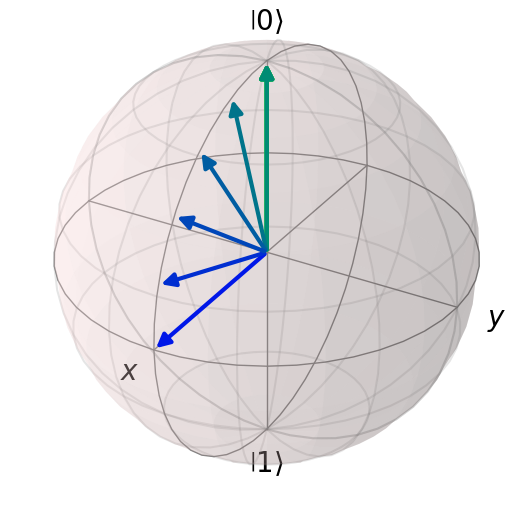

In [39]:
# Apply 5 times Rz(phi) and then 5 times Ry(phi)
# Visualise the initial state, intermediate states, and the final state using the Bloch sphere

# Define the initial quantum state |ψ⟩ = |0⟩
psi = ket(2,0)

# Choose value for phi
phi = np.pi/10

# Define the Rotation Z operation
Rz = rotate_z(phi)

# Define the Rotation Y operation
Ry = rotate_y(phi)

# Initialize the Bloch sphere
bloch_sphere = Bloch()

# Add the initial state to the Bloch sphere
psi_qobj = Qobj(psi)
bloch_sphere.add_states(psi_qobj)

# Apply the Rz operation 5 times and add the intermediate states to the Bloch sphere
for i in range(5):
    psi = np.dot(Rz, psi)
    psi_qobj = Qobj(psi)
    bloch_sphere.add_states(psi_qobj)

# Apply the Ry operation 5 times and add the intermediate states to the Bloch sphere
for i in range(5):
    psi = np.dot(Ry, psi)
    psi_qobj = Qobj(psi)
    bloch_sphere.add_states(psi_qobj)

# Define a color range to visualize the states in the Bloch sphere
nr_colors = 11 # Must be equal to number of times add_states is called
colors = []
for i in range(nr_colors):
    red = 0
    green = 1 - i/nr_colors
    blue = i/nr_colors
    color = [red, green, blue]
    colors.append(color)

# Set vector of colors
bloch_sphere.vector_color = colors

# Render the Bloch sphere
bloch_sphere.show()

### Remark
First we apply 5 times rotation about the $z$-axis with $\varphi=\frac{\pi}{10}$, but this rotation has no effect.
Next we apply 5 times rotation about the $x$-axis with $\varphi=\frac{\pi}{10}$, thus total rotation of $\frac{\pi}{2}$.

## Measuring a qubit
As we have seen above, a quantum state of a single qubit in super position can be represented as

$\ket{\psi} = \alpha|0\rangle + \beta|1\rangle$,

where $\alpha$ and $\beta$ are complex numbers.

When measuring a qubit in super position, it collapses either to $\ket{0}$ or $\ket{1}$. 
The probability that the state collapses to $\ket{0}$ is equal to $|\alpha|^2$ and
the probability that the state collapses to $\ket{1}$ is equal to $|\beta|^2$.

Here it is assumed that the normalization condition holds, i.e.,

$|\alpha|^2 + |\beta|^2 = 1$.

Below, function `measure` is defined to measure the state of the qubit. The result is either $0$ or $1$ depending on a random value between $0$ and $1$ and on the probabilities $|\alpha|^2$ and $|\beta|^2$. 

Suppose $r$ is a random value between $0$ and $1$ drawn from a uniform distribution.
Under the assumption that $|\alpha|^2 + |\beta|^2 = 1$, the measured state $|\psi_m\rangle$ is determined as follows:

$
|\psi_m\rangle =
\begin{cases}
|0\rangle, & \text{if } r < |\alpha|^2 \\
|1\rangle, & \text{otherwise}
\end{cases}
$

In the code below, we use `np.random.uniform(0,1)` to generate a (pseudo) random number $r \in [0,1)$ from a uniform distribution.

In [40]:
def measure(state_vector):
    alpha = state_vector[0, 0]
    probability_zero = np.square(np.abs(alpha))
    random_value = np.random.uniform(0, 1)
    if random_value < probability_zero:
        return "|0>"
    else:
        return "|1>"

Let's initialize the state with $|0\rangle$, apply the Hadamard operation and measure the resulting state. We repeat this $10$ times.

In [41]:
# Define the Hadamard operation
H = hadamard()

# Initialize state, apply the Hadamard operation and measure 10 times
for i in range(10):

    # Define the initial quantum state |ψ⟩ = |0⟩
    psi_init = ket(2,0)

    # Apply the Hadamard operation to bring the qubit in superposition
    psi = np.dot(H, psi_init)

    # Perform measurement
    result = measure(psi)

    # Print result
    print(result)

|1>
|0>
|1>
|1>
|0>
|0>
|0>
|1>
|1>
|1>


The result is sometimes $|0\rangle$ and sometimes $|1\rangle$. 
If we repeat this many times, the expected number of occurrences of $|0\rangle$ and $|1\rangle$ should be about equal.
Below, we measure $1000$ times and we store all measurements in an array. Next, we show the results by plotting a histogram.

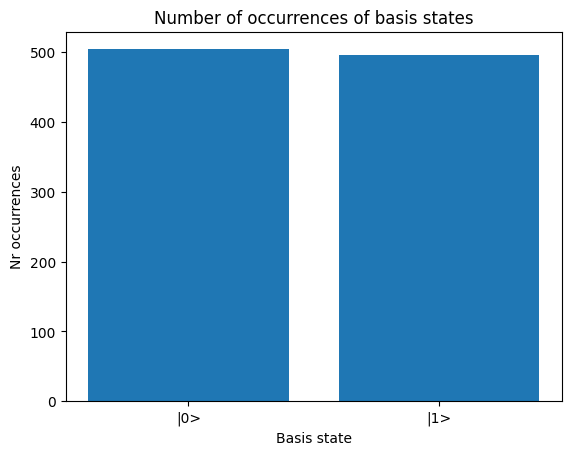

In [42]:
import matplotlib.pyplot as plt
from collections import Counter

# Define the Hadamard operation
H = hadamard()

# Store the measurements
measurements = []

# Initialize state, apply the Hadamard operation and measure 1000 times
for i in range(1000):

    # Define the initial quantum state |ψ⟩ = |0⟩
    psi_init = ket(2,0)

    # Apply the Hadamard operation to bring the qubit in superposition
    psi = np.dot(H, psi_init)

    # Perform measurement
    result = measure(psi)

    # Store the result
    measurements.append(result)

# Create a histogram of the results
histogram = Counter(measurements)
unique_strings = sorted(list(histogram.keys()))
counts = [histogram[string] for string in unique_strings]
plt.bar(unique_strings, counts)
plt.xlabel('Basis state')
plt.ylabel('Nr occurrences')
plt.title('Number of occurrences of basis states')
plt.show()

## Qiskit
From now on, we will use Qiskit to define and simulate executation of quantum circuits.

Run the code below to import the libraries we will use.

In [43]:
# Import the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt

Next, we import the libraries from Qiskit that we will use.

In [44]:
# Import qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

Let's create now a quantum circuit with one qubit. We will apply the Hadamard gate to the qubit and then measure it using Qiskit. We will compare the results from Qiskit with the results from our previous code above.

To create a quantum register with Qiskit, we use the following code:

In [45]:
# Create a quantum register of 1 qubit
qreg = QuantumRegister(1)

At some point, the qubits will be measured. The result of the measurement will be stored in a classical bit. We create a register of classical bits as follows:

In [46]:
# Create a classical register of 1 bit
creg = ClassicalRegister(1)

Once we have created the quantum and classical registers, we can create a quantum circuit using the following code:

In [47]:
# Create a quantum circuit with qreg and creg
circuit = QuantumCircuit(qreg, creg)

Let's print the circuit we just created

In [48]:
# print the circuit
print(circuit)

      
  q0: 
      
c0: 1/
      


We can also draw the circuit.

In [49]:
# Draw the circuit
circuit.draw()

q0: 
      
c0: 1/

To draw the circuit in a more graphical form, set parameter `output='mpl'`

Note that you may have to install `pylatexenc` by

`!pip install pylatexenc`

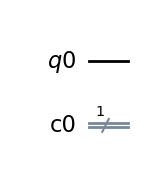

In [50]:
# Draw the circuit
circuit.draw(output='mpl')

Next, the Hadamard gate is applied to the qubit of the quantum circuit. 
Note that in Qiskit, multiple qubits can be defined. So, we need to provide the array index of the qubit.

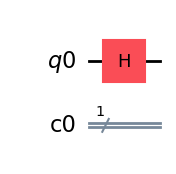

In [51]:
# Apply the Hadamard gate to the qubit
circuit.h(qreg[0])

# Draw the circuit
circuit.draw(output='mpl')

In Qiskit it is possible to measure one or more qubits. The result is either $0$ or $1$ and is stored in one of the classical bits of the circuit.
In this case we have a circuit of one qubit and one classical bit. In the code below, the qubit is measured and the result is stored in the classical bit.

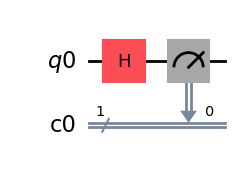

In [52]:
# Measure the qubit
circuit.measure(qreg[0], creg[0])

# Draw the circuit
circuit.draw(output='mpl')


We can retrieve several attributes of the quantum circuit like the number of qubits, the number of classical bits, and the number of gates using the following code:

In [53]:
# Get the number of qubits
print(circuit.num_qubits)

# Get the number of classical bits
print(circuit.num_clbits)

# Get the number of gates
print(circuit.size())

1
1
2


You can also retrieve the qubit statevector using the following code. Note that it is not possible to obtain the state vector after measuring. In the code below we build the same circuit, but without measuring the qubit.

In [54]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a quantum register of 1 qubit
qreg = QuantumRegister(1)

# Create a classical register of 1 bit
creg = ClassicalRegister(1)

# Create a quantum circuit with qreg and creg
circuit = QuantumCircuit(qreg, creg)

# Apply the Hadamard gate to the qubit
circuit.h(qreg[0])

# Get the statevector
state = Statevector.from_instruction(circuit)
print(state)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


## Exercise
Create a quantum circuit of one qubit and one classical bit, apply the Hadamard gate twice to the qubit and print the statevector of the qubit. Compare the final state vector to the initial vector.

In [55]:
# Create a quantum circuit of one qubit and one classical bit.
# Apply the Hadamard gate twice to the qubit
# Print the resulting state vector

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a quantum register of 1 qubit
qreg = QuantumRegister(1)

# Create a classical register of 1 bit
creg = ClassicalRegister(1)

# Create a quantum circuit with qreg and creg
circuit = QuantumCircuit(qreg, creg)

# Apply the Hadamard gate to the qubit
circuit.h(qreg[0])

# Apply the Hadamard gate to the qubit once more
circuit.h(qreg[0])

# Get the statevector
state = Statevector.from_instruction(circuit)
print(state)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


### Remark
The final state is equal to the initial state $\ket{0}$.

## Simulation of a quantum circuit
Now, let's simulate the quantum circuit using Qiskit. 
Before quantum circuit can be executed either on a real quantum computer or on a simulator, the circuit needs to be *transpiled*. 
This means that the circuit is converted to quantum gates that are supported by real quantum computers. 

We can create a quantum circuit and execute it $1000$ times on the Qiskit Aer simulator as follows:

{'0': 527, '1': 473}


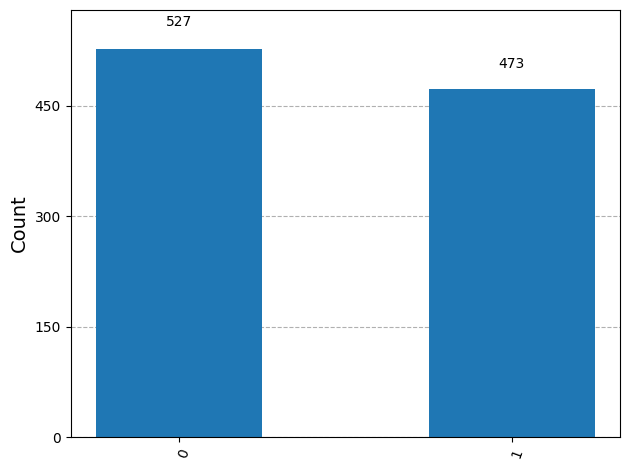

In [56]:
# Import the necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

# To plot the results, import the following library
from qiskit.visualization import plot_histogram

# Create a quantum circuit of one qubit and one classical bit
circuit = QuantumCircuit(1, 1)

# Apply the Hadamard gate to the qubit
circuit.h(0)

# Measure the qubit
circuit.measure(0, 0)

# Simulate the quantum circuit
simulator = Aer.get_backend('aer_simulator')

# Transpile the quantum circuit
job = simulator.run(transpile(circuit, simulator), shots=1000)

# Get the result
result = job.result()

# Get the counts
counts = result.get_counts(circuit)

# Print the counts
print(counts)

# Plot the histogram
plot_histogram(counts)

### Question
What happens when you run the code. Can you interpret the results? What was the quantum state after applying the Hadamard gate?

### Remark
The quantum state after applying the Hadamard gate is the Hadamard state or $\ket{+}$. 
When measuring, the state collapses either to $\ket{0}$ or $\ket{1}$, each with a probability of 0.5.
Thus, about half the times the measured state will $\ket{0}$ and about half the times it will be $\ket{1}$.

## Bloch sphere
Let's visualize the quantum state on a Bloch sphere in the same way as before. 
Note that Bloch sphere visualisation only works for quantum circuits have one qubit.

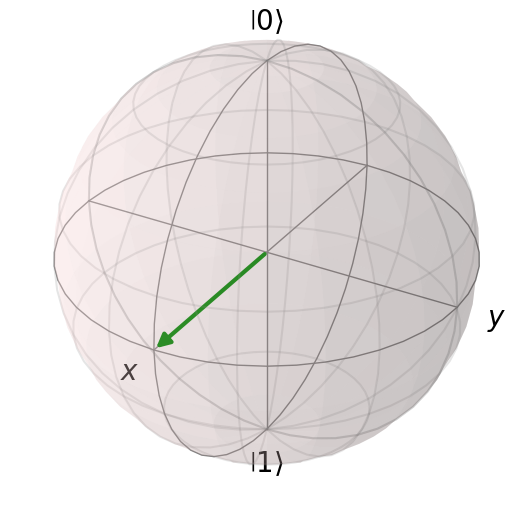

In [57]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a circuit
circuit = QuantumCircuit(1)

# Apply the Hadamard gate
circuit.h(0)  

# Get statevector
psi = Statevector.from_instruction(circuit)

# Create a Qobj for the quantum state
psi_qobj = Qobj(psi)

# Initialize the Bloch sphere
bloch_sphere = Bloch()

# Add the state vector to the Bloch sphere
bloch_sphere.add_states(psi_qobj)

# Render the Bloch sphere
bloch_sphere.show()

### Quantum gates in Qiskit
Qiskit provides all quantum gates introduced above, and more. Below, all quantum gates introduced before are applied one after each other. Next, the state vector is obtained before measurement takes place. The state vector is visualized using the Bloch sphere.

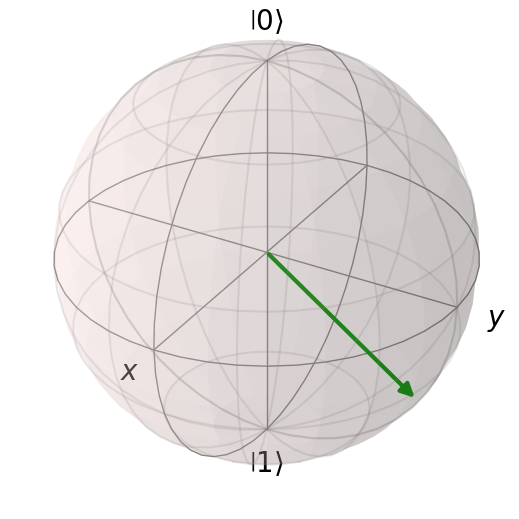

In [58]:
# Define phi for rotation (radians)
phi = -np.pi/8

# Create a quantum circuit of one qubit and one classical bit
circuit = QuantumCircuit(1, 1)

# Apply the Identity gate to the qubit
circuit.id(0)

# Apply the Pauli X gate to the qubit
circuit.x(0)

# Apply the Pauli Y gate to the qubit
circuit.y(0)

# Apply the Pauli Z gate to the qubit
circuit.z(0)

# Apply the Hadamard gate to the qubit
circuit.h(0)

# Apply the phase gate to the qubit
circuit.p(phi, 0)

# Apply the S-gate to the qubit
circuit.s(0)

# Apply the T-gate to the qubit
circuit.t(0)

# Apply rotate-x to the qubit
circuit.rx(phi, 0)

# Apply rotate-x to the qubit
circuit.ry(phi, 0)

# Apply rotate-x to the qubit
circuit.rz(phi, 0)

# Get statevector
psi = Statevector.from_instruction(circuit)

# Create a Qobj for the quantum state
psi_qobj = Qobj(psi)

# Initialize the Bloch sphere
bloch_sphere = Bloch()

# Add the state vector to the Bloch sphere
bloch_sphere.add_states(psi_qobj)

# Render the Bloch sphere
bloch_sphere.show()

Next, measurement is added. As before, the result will be stored in the classical bit.

In [59]:
# Measure the qubit
circuit.measure(0, 0)

Let's draw the circuit and see how the different gates are visualised in Qiskit.

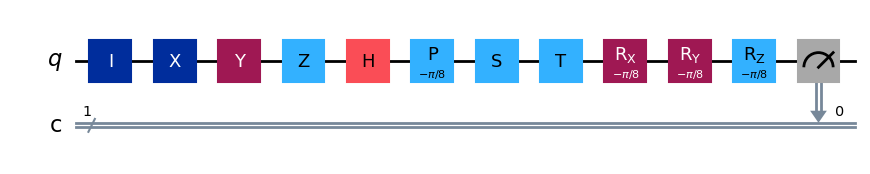

In [60]:
# Draw the circuit
circuit.draw(output='mpl')

Let's simulate execution of the circuit $1000$ times and show the results in a histogram.

{'1': 732, '0': 268}


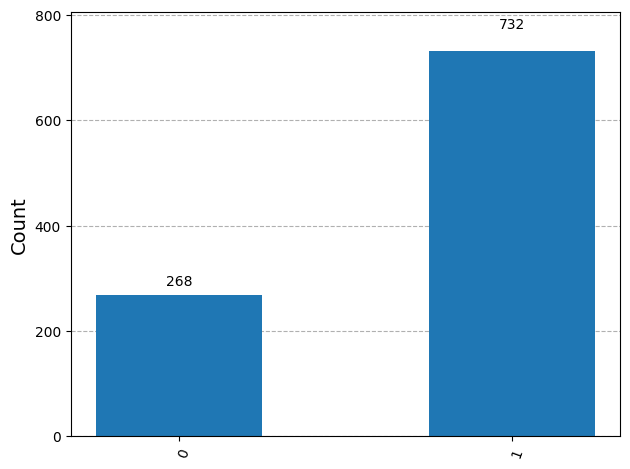

In [61]:
# Simulate the quantum circuit
simulator = Aer.get_backend('aer_simulator')

# Transpile the quantum circuit
job = simulator.run(transpile(circuit, simulator), shots=1000)

# Get the result
result = job.result()

# Get the counts
counts = result.get_counts(circuit)

# Print the counts
print(counts)

# Plot the histogram
plot_histogram(counts)

### Question
Have a look at the Bloch sphere and at the histogram of the results. Would you expect this distribution of the measurements?

### Remark
Looking at the Bloch sphere, the probability of measuring $\ket{0}$ is greater than the probability of measuring $\ket{1}$.
This corresponds to the distribution in the histogram.

### Exercise
Change the value of $\varphi$ to $-\frac{\pi}{8}$ and repeat the whole procedure. As before, have a look at the Bloch sphere and at the histogram of the results. Would you expect this distribution of the measurements?

### Remark
In the code just below *Quantum gates in Qiskit* you should replace the line 

`phi = np.pi/8`

with

`phi = -np.pi/8`

The arrow in the Bloch sphere will then be below the equator, indicating that the probability of measuring $\ket{1}$ 
is greater than the probability of measuring $\ket{0}$. This can also be observed in the histogram.

## Quantum Phase Estimation
Consider the following circuit in Qiskit:
```python
phi = np.pi/4
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.p(phi, 0)
circuit.h(0)
```
We will show how $\varphi$ can be estimated using a large number of measurements.

### Exercise
Write Python code to create this circuit, execute and measure $1000$ times and visualize the results using a histogram. Can you explain the results?

Visualize the initial, intermediate and final quantum state using a Bloch sphere. Does this help explaining the distribution of the measurements?

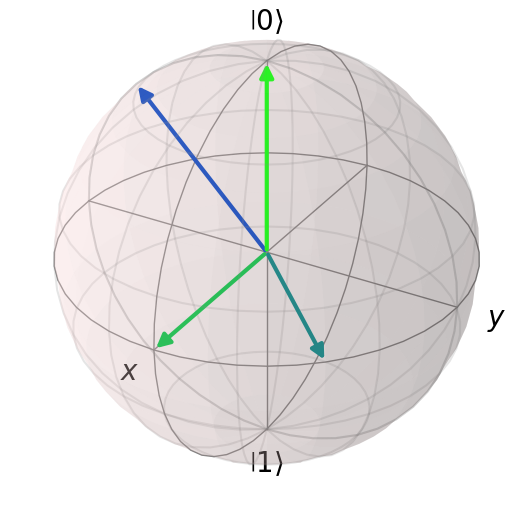

In [62]:
# Create a circuit of one qubit and one classical bit
# Apply Hadamard, P(phi), and Hadamard
# Visualize the initial, intermediate and final quantum state using a Bloch sphere

# Import numpy and qutip libraries
import numpy as np
from qutip import Bloch, Qobj

# Import Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

# To plot the results, import the following library
from qiskit.visualization import plot_histogram

# Define the quantum circuit and store all quantum states
phi = np.pi/4
circuit = QuantumCircuit(1, 1)
quantum_states = []
quantum_states.append(Statevector.from_instruction(circuit))
circuit.h(0)
quantum_states.append(Statevector.from_instruction(circuit))
circuit.p(phi, 0)
quantum_states.append(Statevector.from_instruction(circuit))
circuit.h(0)
quantum_states.append(Statevector.from_instruction(circuit))

# Create the Bloch sphere and add the quantum states
bloch_sphere = Bloch()
for state in quantum_states:
    bloch_sphere.add_states(Qobj(state))

# Define a color range to visualize the states in the Bloch sphere
nr_colors = len(quantum_states)
colors = []
for i in range(nr_colors):
    red = 0
    green = 1 - i/nr_colors
    blue = i/nr_colors
    color = [red, green, blue]
    colors.append(color)

# Set vector of colors
bloch_sphere.vector_color = colors

# Render the Bloch sphere
bloch_sphere.show()

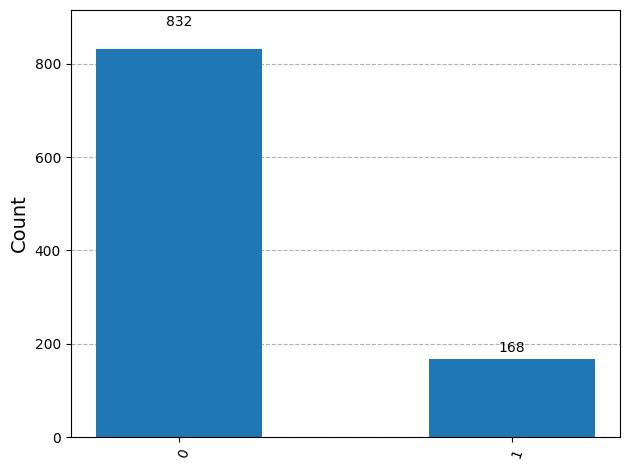

In [63]:
# Execute and measure 1000 times
# Visualize the results using a histogram

# Measure the circuit
circuit.measure(0,0)

# Execute the circuit 1000 times on a simulator
simulator = Aer.get_backend('aer_simulator')
job = simulator.run(transpile(circuit, simulator), shots=1000)
result = job.result()
counts = result.get_counts(circuit)

# Plot histogram of measurements
plot_histogram(counts)


By measuring a large number of times it is possible to estimate the value of $\phi$. In fact, this the principle behind *quantum phase estimation*.
Let's have a look at the mathematics.

We begin with the initial state:

$\ket{0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

Next, we apply the Hadamard gate:

$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

$H \ket{0} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \ket{+}$

Now we apply the phase gate:

$P(\varphi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\varphi} \end{bmatrix}$

$P(\varphi) \cdot H \ket{0} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{i\varphi} \end{bmatrix}$

Finally, we apply the Hadamard gate again:

$H \cdot \left( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{i\varphi} \end{bmatrix} \right) =
\frac{1}{\sqrt{2}} \cdot \frac{1}{\sqrt{2}} \begin{bmatrix} 1 + e^{i\theta} \\ 1 - e^{i\theta} \end{bmatrix} =
\frac{1}{2} \begin{bmatrix} 1 + e^{i\theta} \\ 1 - e^{i\theta} \end{bmatrix}$

Thus, the final state is:

$\ket{\psi} = \frac{1}{2} \begin{bmatrix} 1 + e^{i\varphi} \\ 1 - e^{i\varphi} \end{bmatrix}$

This can also be written as

$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$,

with $\alpha = \frac{1 + e^{i\varphi}}{2}$ and $\beta = \frac{1 - e^{i\varphi}}{2}$.

The probability of measuring $\ket{0}$ is denoted by $p_0$ and is defined by

$p_0 = |\alpha|^2 = \left| \frac{1 + e^{i\varphi}}{2} \right|^2 = \cos^2(\frac{\varphi}{2})$.

We can estimate $p_0$ from the histogram. It is the fraction of zero measurements of the total number of measurements. 

Suppose the number of zero measurements is $850$ and the total number of measurements is $1000$, then $p_0 = \frac{850}{1000}$ and 
$\varphi$ can be estimated by

$\varphi_\text{est} = 2 \arccos(\sqrt{p_0})$.

Below this computation is done in Python.

In [64]:
import numpy as np

# Actual phi
phi = np.pi/4

# Results from measurements
total_nr_measurements = 1000
nr_zero_measurments = 850 

# Estimate phi from measurements
prob_zero = nr_zero_measurments / total_nr_measurements
phi_est = 2 * np.arccos(np.sqrt(prob_zero))

# Print actual phi and estimated phi
print(f"Actual phi    : {phi:.4f} radians")
print(f"Estimated phi : {phi_est:.4f} radians")

Actual phi    : 0.7854 radians
Estimated phi : 0.7954 radians


### Exercise
Extend your program from the last exercise to estimate the value of $\varphi$. 
Try different values for $\varphi$ and increase the number of measurements to get a better estimate.

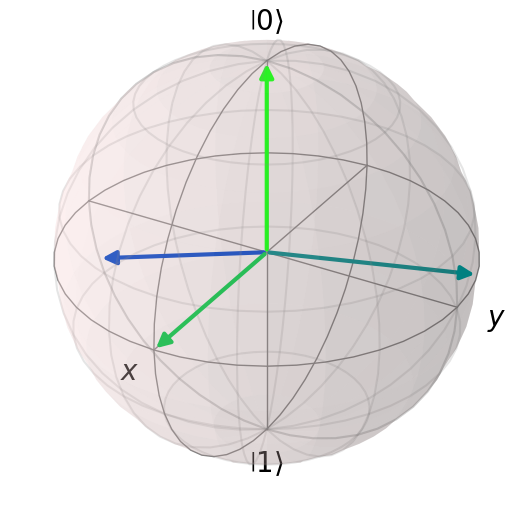

In [65]:
# Create a circuit of one qubit and one classical bit
# Apply Hadamard, P(phi), and Hadamard
# Visualize the initial, intermediate and final quantum state using a Bloch sphere

# Import numpy and qutip libraries
import numpy as np
from qutip import Bloch, Qobj

# Import Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

# To plot the results, import the following library
from qiskit.visualization import plot_histogram

# Define the quantum circuit and store all quantum states
# Choose phi = 3/5 pi instead of pi/4
phi = (3/5)*np.pi
circuit = QuantumCircuit(1, 1)
quantum_states = []
quantum_states.append(Statevector.from_instruction(circuit))
circuit.h(0)
quantum_states.append(Statevector.from_instruction(circuit))
circuit.p(phi, 0)
quantum_states.append(Statevector.from_instruction(circuit))
circuit.h(0)
quantum_states.append(Statevector.from_instruction(circuit))

# Create the Bloch sphere and add the quantum states
bloch_sphere = Bloch()
for state in quantum_states:
    bloch_sphere.add_states(Qobj(state))

# Define a color range to visualize the states in the Bloch sphere
nr_colors = len(quantum_states)
colors = []
for i in range(nr_colors):
    red = 0
    green = 1 - i/nr_colors
    blue = i/nr_colors
    color = [red, green, blue]
    colors.append(color)

# Set vector of colors
bloch_sphere.vector_color = colors

# Render the Bloch sphere
bloch_sphere.show()

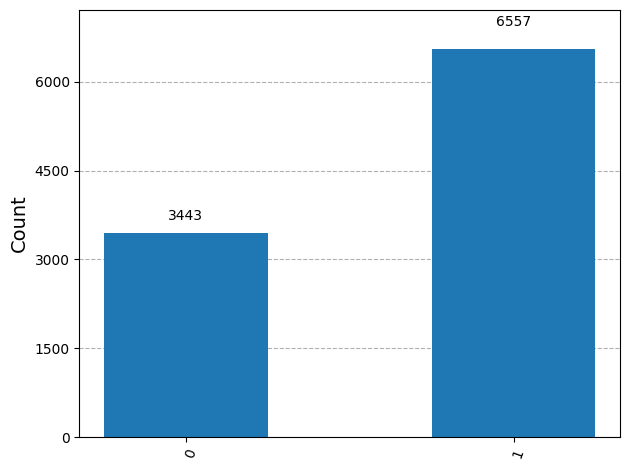

In [66]:
# Execute and measure 1000 times
# Visualize the results using a histogram

# Measure the circuit
circuit.measure(0,0)

# Execute the circuit 10000 times on a simulator (instead of 1000)
nr_shots = 10000
simulator = Aer.get_backend('aer_simulator')
job = simulator.run(transpile(circuit, simulator), shots=nr_shots)
result = job.result()
counts = result.get_counts(circuit)

# Plot histogram of measurements
plot_histogram(counts)

In [67]:
# Estimate the value of phi

# Results from measurements
total_nr_measurements = nr_shots
nr_zero_measurements = counts.get('0')

# Estimate phi from measurements
prob_zero = nr_zero_measurements / total_nr_measurements
phi_est = 2 * np.arccos(np.sqrt(prob_zero))

# Print actual phi and estimated phi
print(f"Actual phi    : {phi:.4f} radians")
print(f"Estimated phi : {phi_est:.4f} radians")

Actual phi    : 1.8850 radians
Estimated phi : 1.8875 radians


### Remark
Note that the code above works properly for $0 \leq \varphi < \pi$. 
In case $\varphi = \pi$, the number of zero measurements is 0 and an error will occur, because there is no '0' in `counts`. 
In case $\varphi < 0$ or $\varphi > \pi$, the estimated value for $\varphi$ will be a value between $0$ and $\pi$.